# Here is will be the practice for curse by statistics by week 2

In [4]:
import numpy as np

(89.9 - 80.7) / np.sqrt(11.3**2 / 20 + 11.7**2 / 20)

2.529439633102561

/tmp/ipykernel_34457/1739476708.py:27: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  bplot2 = ax2.errorbar(x=df.index, y=df['Mx'], yerr=df['interval'],\


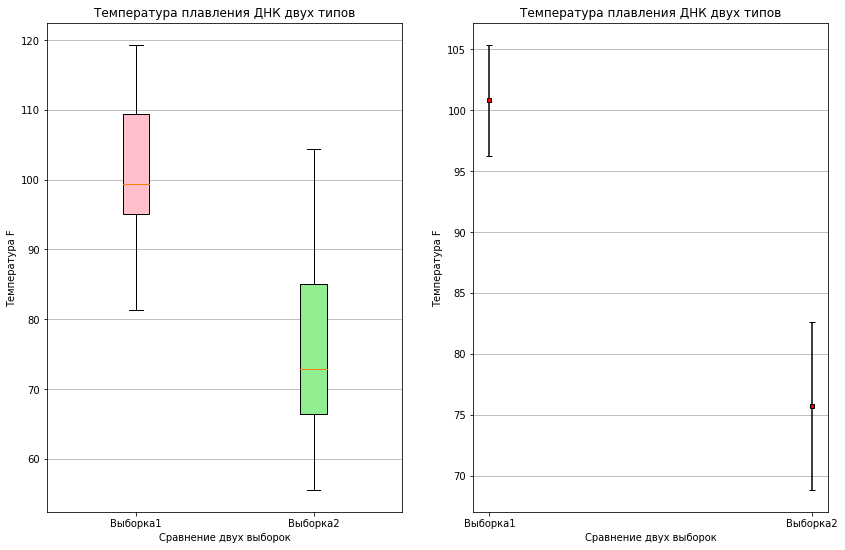

In [5]:
import pandas as pd
from scipy.stats import t
import matplotlib.pyplot as plt

array1 = [84.7, 105.0, 98.9, 97.9, 108.7, 81.3, 99.4, 89.4, 93.0, 119.3, 99.2, 99.4, 97.1, 112.4, 99.8, 94.7, 114.0, 95.1, 115.5, 111.5]
array2 = [57.2, 68.6, 104.4, 95.1, 89.9, 70.8, 83.5, 60.1, 75.7, 102.0, 69.0, 79.6, 68.9, 98.6, 76.0, 74.8, 56.0, 55.6, 69.4, 59.5]

# считаем количество элементов, среднее, стандартное отклонение и стандартную ошибку
df = pd.DataFrame({'Выборка1':array1, 'Выборка2':array2}).agg(['mean','std','count','sem']).transpose()
df.columns = ['Mx','SD','N','SE']

# рассчитываем 95% интервал отклонения среднего
p = 0.95
K = t.ppf((1 + p)/2, df['Mx']-1)
df['interval'] = K * df['SE']

#строим графики, boxplot из изначальных данных array1, array2,  доверительные интервалы из датафрейма df
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 9))

# график boxplot
bplot1 = ax1.boxplot([array1, array2],
                     vert=True,  # создаем вертикальные боксы
                     patch_artist=True, # для красоты заполним цветом боксы квантилей
                     labels=['Выборка1', 'Выборка2']) # используется для задания значений выборок в случае с boxplot

# график доверительных интервалов
bplot2 = ax2.errorbar(x=df.index, y=df['Mx'], yerr=df['interval'],\
                      color="black", capsize=3, marker="s", markersize=4, mfc="red", mec="black", fmt ='o')

# раскрасим boxplot  
colors = ['pink', 'lightgreen']
for patch, color in zip(bplot1['boxes'], colors):
    patch.set_facecolor(color)
    
# добавим общие для каждого из графиков данные
for ax in [ax1, ax2]:
    ax.yaxis.grid(True)
    ax.set_title('Температура плавления ДНК двух типов')
    ax.set_xlabel('Сравнение двух выборок')
    ax.set_ylabel('Температура F')
    
plt.show()

In [19]:
from scipy import stats
from math import sqrt

mean = 89.9
sd = 11.3
n = 20
# степень свободы
df = n - 1
# 95% доверительный интервал
p = 0.95
alpha = 1-p
# стандартная ошибка
se = sd/sqrt(n)

# ppf - Percent point function
# делим на два, так как по умолчанию функция считает для одного конца, а нам надо для двух
t_value = stats.t(df).ppf(1-(alpha/2))

# доверительный интервал 
сonfidence_interval = (mean-t_value*se, mean+t_value*se)
сonfidence_interval

(84.61143720745503, 95.18856279254499)

In [29]:
n = 100
mean_men, sd_men = 45, 9
mean_women, sd_women = 34, 10

In [30]:
t_value = (mean_men - mean_women) / (np.sqrt(sd_men**2/n + sd_women**2/n))
t_value

8.176235608718828

In [31]:
p =  2 * (1 - stats.t.cdf(abs(t_value), n-1))
p

1.0049738818906917e-12

In [4]:
t = 12
df=58

In [5]:
from scipy import stats
2 * (1 - stats.t.cdf(abs(t), df))

0.0

In [1]:
1 / 6

0.16666666666666666

In [1]:
import pandas as pd

In [99]:
df = pd.read_csv('https://stepik.org/media/attachments/lesson/8083/genetherapy.csv')
df.head()

,expr,Therapy
0,100,A
1,96,A
2,101,A
3,95,A
4,103,A


In [100]:
groups = df.groupby('Therapy')['expr'].agg(['mean', 'std', 'count'])
groups

,mean,std,count
Therapy,,,
A,99.733333,4.165619,15
B,98.800000,5.894307,15
C,94.400000,5.193402,15
D,92.333333,3.735289,15


In [101]:
mean_groups = groups['mean'].mean()
n = groups.apply(len)
mean_groups

96.31666666666666

In [127]:
def range_ssb(group):
    return (group - mean_groups)**2

SSB = (groups['mean'].apply(range_ssb) * groups['count']).sum()
SSB

560.7166666666667

<ErrorbarContainer object of 3 artists>

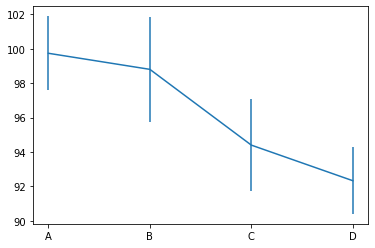

In [78]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
URL = 'https://stepik.org/media/attachments/lesson/8083/genetherapy.csv'
data = pd.read_csv(URL)
groups = data.groupby('Therapy')['expr']
n = groups.apply(len)
mean = groups.mean()
std = groups.std() / np.sqrt(n)
# 
plt.errorbar(x = mean.index, y = mean, yerr = 2*std)

In [79]:
mean

Therapy
A    99.733333
B    98.800000
C    94.400000
D    92.333333
Name: expr, dtype: float64

In [32]:
n = 10
x = 6
# formule sum of the geometrig progression
geom_sum = 0
for i in range(0, n):
    geom_sum += ((x**(i+1)) - 1) / (x-1)
print(geom_sum/2)

7255940.0


In [33]:
n = 11
x = 6
# formule sum of the geometrig progression
geom_sum = 0
for i in range(0, n):
    geom_sum += x**i
print(geom_sum)

72559411


In [1]:
X = [4, 5, 2, 3, 1]
Y = [2, 1, 4, 3, 5]

In [2]:
from matplotlib import pyplot

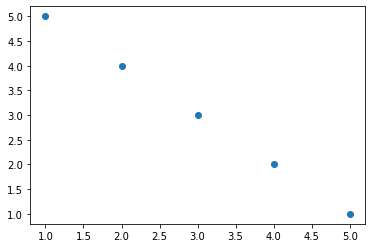

In [3]:
pyplot.scatter(X, Y)